# Exemplo de regressão linear com Sklearn

In [73]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import numpy as np

df = pd.read_csv("heavymachine_data.csv", sep=";")
output_colum = "Hours"
input_colums = ["Model","Aplication","Age"]
#retira coluna inutil
df.drop("Chassi", axis="columns", inplace=True)
#retira dados ruidosos
hours = df["Hours"]
std = hours.std()
mean = hours.mean()
df.drop(hours[hours > mean+std].index, inplace=True)

train_dataset = df.sample(frac=0.7,random_state=0)
test_dataset = df.drop(train_dataset.index)

df_dummys = pd.get_dummies(df, columns=["Aplication", "Model"])
train_ds_dummys = df_dummys.sample(frac=0.7,random_state=0)
test_ds_dummys = df_dummys.drop(train_dataset.index)

df.head()

,Hours,Model,Aplication,Age
0,461,111,71,11
1,277,90,39,10
2,905,87,35,10
3,437,87,72,10
4,311,90,35,10


# O modelo

Non categorical

In [74]:
model = []
age = []
Aplication = []
y = []
x = []
for i,r in train_dataset.iterrows():    
    model.append(r["Model"])
    age.append(r["Age"])
    Aplication.append(r["Aplication"])
    x.append([r["Model"], r["Age"], r["Aplication"]])
    y.append(r["Hours"])
    # r.drop("Hours", inplace=True)
    # print(list(r))
    # break

# x = np.array(age).reshape(-1,1)
# x = np.array([model, age, Aplication])
# y = np.array(y)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
# Print the Intercept:
print('intercept:', model.intercept_)
# Print the Slope:
print('slope:', model.coef_) 

coefficient of determination: 0.18174806937565924
intercept: 1152.77247849005
slope: [-4.15060080e-02  2.43244947e+02 -3.90096696e+00]


Categorical model

In [75]:
y = []
x = []
for i,r in train_ds_dummys.iterrows():    
    y.append(r["Hours"])
    r.drop("Hours", inplace=True)
    x.append(list(r))

# x = np.array(age).reshape(-1,1)
# x = np.array([model, age, Aplication])
# y = np.array(y)
model_categorical = LinearRegression().fit(x, y)
r_sq = model_categorical.score(x, y)
print('coefficient of determination:', r_sq)
# Print the Intercept:
print('intercept:', model_categorical.intercept_)
# Print the Slope:
print('slope:', model_categorical.coef_) 

coefficient of determination: 0.6162099391630171
intercept: 198322489690214.44
slope: [ 2.77371378e+02  3.50588680e+13  3.50588680e+13  3.50588680e+13
  3.50588680e+13  3.50588680e+13  3.50588680e+13  3.50588680e+13
  3.50588680e+13  3.50588680e+13  3.50588680e+13  3.50588680e+13
  3.50588680e+13  3.50588680e+13  3.50588680e+13  3.50588680e+13
  3.50588680e+13  3.50588680e+13  3.50588680e+13  3.50588680e+13
  3.50588680e+13  3.50588680e+13  3.50588680e+13  3.50588680e+13
  3.50588680e+13  3.50588680e+13  3.50588680e+13  2.30996875e+12
  3.50588680e+13  3.50588680e+13  3.50588680e+13  3.50588680e+13
  3.50588680e+13  3.50588680e+13  3.50588680e+13  3.50588680e+13
  3.50588680e+13  3.50588680e+13  3.50588680e+13  3.50588680e+13
  3.50588680e+13  3.50588680e+13  3.50588680e+13  3.50588680e+13
  3.50588680e+13  3.50588680e+13  3.50588680e+13  3.50588680e+13
  3.50588680e+13  3.50588680e+13  3.50588680e+13  3.50588680e+13
  3.50588680e+13  3.50588680e+13  3.50588680e+13  3.50588680e+13
  3.

# Calculando MAE

Non categorical

In [76]:
errors = []
for i,r in test_dataset.iterrows():        
    y_true = pd.to_numeric(r["Hours"])
    r.drop("Hours", inplace=True)
    in_data = np.array(list(r)).reshape(-1,r.shape[0])
    # in_data = pd.DataFrame([{"Model": r["Model"], "Aplication": r["Aplication"], "Age":r["Age"]}])
    y_pred = model.predict(in_data)
    errors.append(abs(y_pred - y_true))
mae = np.mean(errors)
print(mae)

7874.829368372211


Categorical

In [77]:
errors = []
for i,r in test_ds_dummys.iterrows():        
    y_true = pd.to_numeric(r["Hours"])
    r.drop("Hours", inplace=True)
    in_data = np.array(list(r)).reshape(-1,r.shape[0])    
    y_pred = model_categorical.predict(in_data)
    errors.append(abs(y_pred - y_true))
mae = np.mean(errors)
print(mae)

6219186934752.236


# Prevendo valores

In [33]:
MODEL = 90
APLICATION = 39
x4 = []
t = []
samples = len(y)
for i in range(samples):
    t.append(age[i])
    x4.append([MODEL, age[i], APLICATION])

# Predict a Response and print it:
y_pred = model.predict(x4)
print('Predicted response:', y_pred, sep='\n')

Predicted response:
[3628.03755149 3392.68495167 3392.68495167 ... 1509.86415316 1509.86415316
 2215.9219526 ]


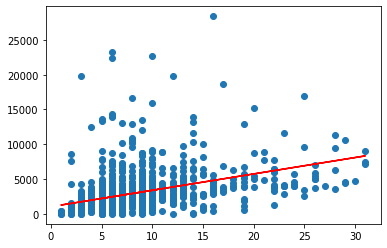

In [35]:
plt.figure()
plt.plot(t, y_pred, "r")
plt.scatter(t, y[:samples])
plt.show()